In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Constructing strip plots
Regressions are useful to understand relationships between two continuous variables. Often we want to explore how the distribution of a single continuous variable is affected by a second categorical variable. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

For example, sns.stripplot(x='type', y='length', data=df) produces a sequence of vertical strip plots of length distributions grouped by type (assuming length is a continuous column and type is a categorical column of the DataFrame df).
Overlapping points can be difficult to distinguish in strip plots. The argument jitter=True helps spread out overlapping points.
Other matplotlib arguments can be passed to sns.stripplot(), e.g., marker, color, size, etc.

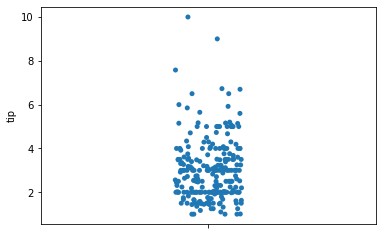

In [6]:
sns.stripplot(y='tip', data=tips)

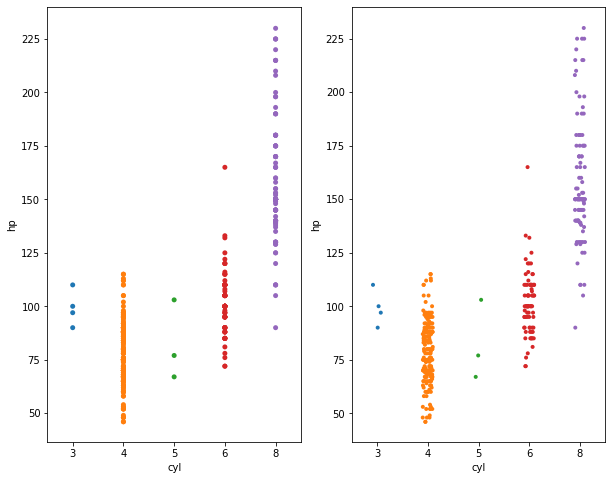

In [37]:
auto = pd.read_csv('auto-mpg.csv')
plt.figure(figsize=(10,8))
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(1,2,1)
sns.stripplot(x="cyl", y="hp", data=auto, jitter=False)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(1,2,2)
sns.stripplot(x="cyl", y="hp", data=auto, jitter=True, size=4)

# Display the plot
plt.show()
# more cylinders tend to have more HP

Text(0.5, 1.0, 'Tips ($)')

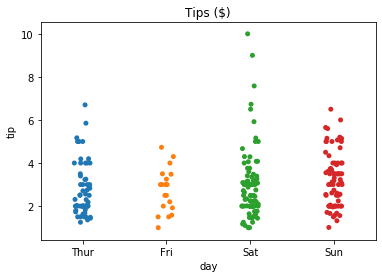

In [9]:
sns.stripplot(x='day', y='tip', data=tips)
plt.title("Tips ($)")

Text(0.5, 1.0, 'Tips ($)')

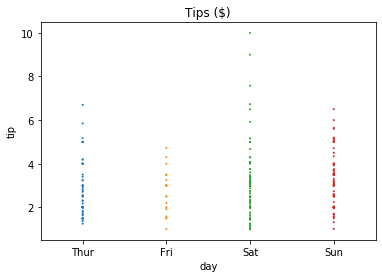

In [15]:
sns.stripplot(x='day',
              y='tip', 
              data=tips, 
              size=2, 
              jitter=False #this param "spread" the points
             )
plt.title("Tips ($)")

## Constructing swarm plots
As you have seen, a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

The syntax for sns.swarmplot() is similar to that of sns.stripplot(), e.g., sns.swarmplot(x='type', y='length', data=df).
The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using orient='h' (horizontal) or orient='v' (vertical).
Another grouping can be added in using the hue keyword. For instance, using sns.swarmplot(x='type', y='length', data=df, hue='build year') makes a swarm plot from the DataFrame df with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.
In this exercise, you'll use the auto DataFrame again to illustrate the use of sns.swarmplot() with grouping by hue and with explicit specification of the orientation using the keyword orient.

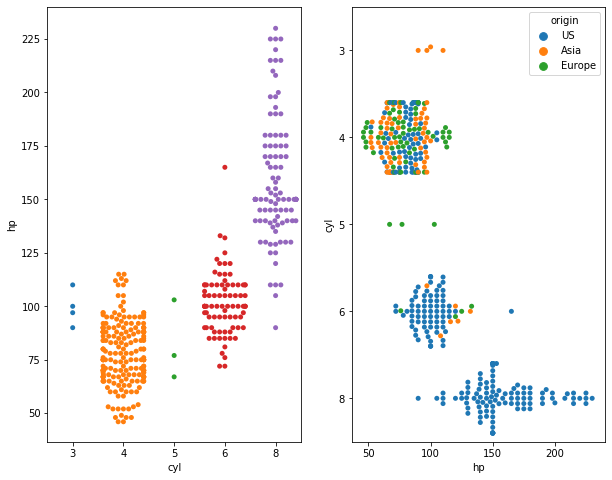

In [47]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.swarmplot(x="cyl", y="hp", data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(1,2,2)
sns.swarmplot(x="hp", y="cyl", data=auto, hue="origin", orient="h")

# Display the plot
plt.show()


Text(0.5, 1.0, 'Tips ($)')

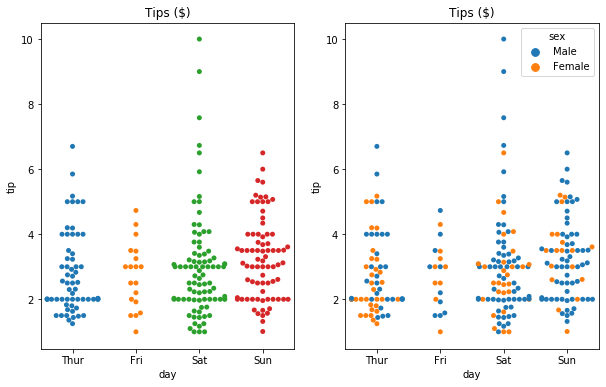

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.swarmplot(x='day', y='tip', data=tips)
plt.title("Tips ($)")
# automatically arrange points representing repetead values to avoid overlap and give a sense of distribution
plt.subplot(1,2,2)
sns.swarmplot(x='day', y='tip', data=tips, hue='sex')
plt.title("Tips ($)")

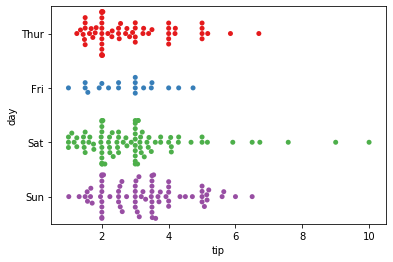

In [24]:
sns.swarmplot(y='day', x='tip', data=tips, palette="Set1", orient='h')

## Constructing violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

Here, you will produce violin plots of the distribution of horse power ('hp') by the number of cylinders ('cyl'). Additionally, you will combine two different plot types by overlaying a strip plot on the violin plot.

As before, the DataFrame has been pre-loaded for you as auto

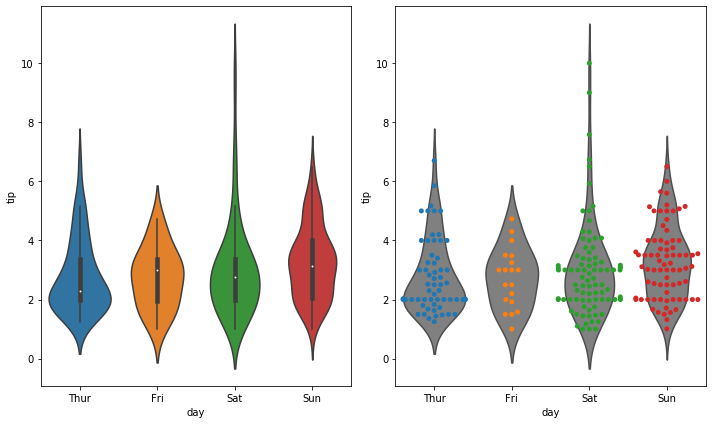

In [38]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.violinplot(x='day',y='tip', data=tips)

plt.subplot(1,2,2)
sns.violinplot(x='day',y='tip', data=tips, inner=None, color='gray')
sns.swarmplot(x='day', y='tip', data=tips)
plt.tight_layout()
tips.groupby('day').tip.count()

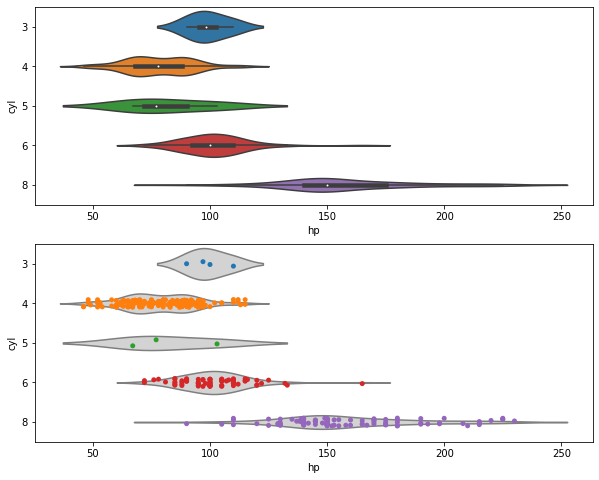

In [52]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.violinplot(x='hp', y="cyl", data=auto, orient="h")

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='hp', y="cyl", orient="h", data=auto, color='lightgray', inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x='hp', y="cyl", orient="h", data=auto)

# Display the plot
plt.show()